### INTRODUCTION:

##### New York City Road Safety Analysis

The safety of New York City's roads is a pressing concern for its residents, visitors, and policymakers. With a population of over 8.4 million people and millions more commuting daily, ensuring the well-being of all road users is crucial.The New York City Department of Transportation (NYCDOT) has implemented Vision Zero, an initiative aimed at eliminating traffic fatalities and serious injuries. To inform effective strategies, it is essential to analyze accident data and identify trends, patterns, and contributing factors.This analysis utilizes a comprehensive dataset covering road accidents in New York City from 2021 to 2023.
##### This analysis aims to:
1. Identify key trends and patterns in NYC road accidents
2. Determine contributing factors and vulnerable road user groups
3. Inform data-driven decision-making for road safety initiatives
4. Support the Vision Zero goal of eliminating traffic fatalities and serious injuries

In [ ]:
import pandas as pd
df=pd.read_csv("C:NYC_Collisions.csv")
print(df)

        Collision ID        Date      Time        Borough  \
0            4491746  2021-01-01  20:00:00          Bronx   
1            4441905  2021-01-01  05:28:00       Brooklyn   
2            4382769  2021-01-01  06:00:00  Staten Island   
3            4380949  2021-01-01  19:30:00          Bronx   
4            4380940  2021-01-01  07:40:00       Brooklyn   
...              ...         ...       ...            ...   
238416       4619581  2023-04-09  04:21:00       Brooklyn   
238417       4619685  2023-04-09  08:30:00         Queens   
238418       4619519  2023-04-09  21:19:00       Brooklyn   
238419       4619921  2023-04-09  11:00:00      Manhattan   
238420       4619618  2023-04-09  19:10:00          Bronx   

                  Street Name              Cross Street   Latitude  Longitude  \
0         Bruckner Expressway                       NaN  40.833980 -73.826350   
1            Lafayette Avenue                       NaN  40.687300 -73.973656   
2       West Shore Expre

In [41]:
df.describe()

,Collision ID,Latitude,Longitude,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
count,2.384210e+05,216098.000000,216098.000000,238420.000000,238421.000000,238421.000000,238421.000000,238421.000000,238421.000000,238421.00000,238421.000000
mean,4.500533e+06,40.724492,-73.916623,0.487484,0.002663,0.079175,0.001200,0.045852,0.000197,0.34153,0.001124
std,6.887904e+04,0.081815,0.084120,0.806650,0.053535,0.285696,0.034855,0.212723,0.014039,0.77766,0.036041
min,4.073803e+06,40.499710,-74.254960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.440909e+06,40.666386,-73.962950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4.500549e+06,40.714690,-73.920610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,4.560178e+06,40.784048,-73.868616,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,4.619988e+06,40.912884,-73.700610,40.000000,3.000000,19.000000,2.000000,3.000000,1.000000,40.00000,3.000000


In [42]:
# finding the null values
data=df.isnull().sum()
print(data)

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64


In [43]:
# modifying the column names
for i in df:
    j=i.replace(" ","_")
    df=df.rename(columns={i:j.capitalize()})
    #print(df)


In [44]:
df.head()

,Collision_id,Date,Time,Borough,Street_name,Cross_street,Latitude,Longitude,Contributing_factor,Vehicle_type,Persons_injured,Persons_killed,Pedestrians_injured,Pedestrians_killed,Cyclists_injured,Cyclists_killed,Motorists_injured,Motorists_killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [45]:
# dropping the rows which has null values
df=df.dropna(subset='Borough')
df=df.dropna(subset='Street_name')
df=df.dropna(subset='Cross_street')
df=df.dropna(subset='Latitude')
df=df.dropna(subset='Contributing_factor')



In [46]:
df

,Collision_id,Date,Time,Borough,Street_name,Cross_street,Latitude,Longitude,Contributing_factor,Vehicle_type,Persons_injured,Persons_killed,Pedestrians_injured,Pedestrians_killed,Cyclists_injured,Cyclists_killed,Motorists_injured,Motorists_killed
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
8,4381082,2021-01-01,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,40.663227,-73.931590,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
10,4380780,2021-01-01,03:00:00,Queens,230 Street,148 Avenue,40.656384,-73.753060,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
15,4381013,2021-01-01,00:25:00,Queens,21 Street,21 Avenue,40.782280,-73.914604,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
19,4380859,2021-01-01,16:25:00,Queens,Utopia Parkway,28 Avenue,40.772040,-73.792370,Unsafe Speed,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238414,4619471,2023-04-09,19:53:00,Brooklyn,Linden Boulevard,Euclid Avenue,40.667953,-73.870070,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
238415,4619465,2023-04-09,07:40:00,Brooklyn,Euclid Avenue,Etna Street,40.686504,-73.874954,Unspecified,Passenger Vehicle,2.0,0,0,0,0,0,2,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0


#### 1.  Analyze the accident data and identify the places with the highest and lowest frequency of accidents.


In [47]:

most_accidents = df['Borough'].value_counts().nlargest(1).index[0]
print(f"The borough with the most accidents is: {most_accidents}")

least_accidents = df['Borough'].value_counts().idxmin()
print(f"The borough with the least accidents is: {least_accidents}")




The borough with the most accidents is: Brooklyn
The borough with the least accidents is: Staten Island


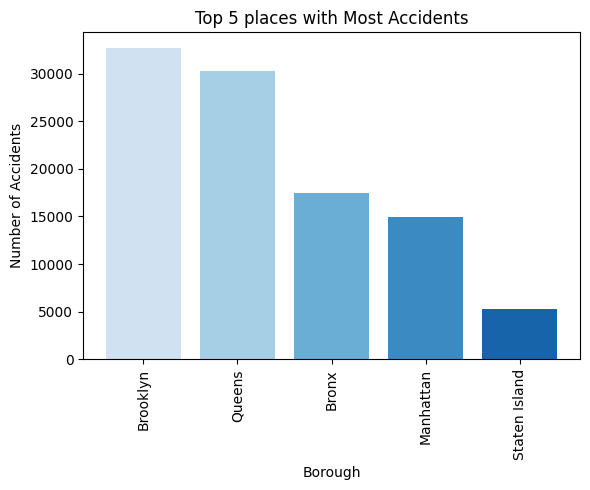

In [70]:

import matplotlib.pyplot as plt
import numpy as np

# Get the count of accidents for each local authority
local_Borough_accidents = df['Borough'].value_counts()

# Top 10 local authorities with the most accidents
top_10_local_authorities = local_Borough_accidents.nlargest(15)

plt.figure(figsize=(6, 5))
plt.bar(top_10_local_authorities.index, top_10_local_authorities.values, 
        color=plt.cm.Blues(np.linspace(0.2, 0.8, len(top_10_local_authorities))))

plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.title('Top 5 places with Most Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

##### Brooklyn has the highest number of accidents because of the factors like traffic volume, road condition and complex streets while Staten Island has fewer accidents because it has a lower population.

#### 2. Analyze the data and identify the time period with the highest frequency of accidents. 


<bound method Series.sort_index of Time
00:00:00    1649
15:00:00    1046
16:00:00     978
14:00:00     964
17:00:00     940
            ... 
03:34:00       6
03:56:00       5
05:31:00       5
03:49:00       4
03:03:00       4
Name: count, Length: 1440, dtype: int64>


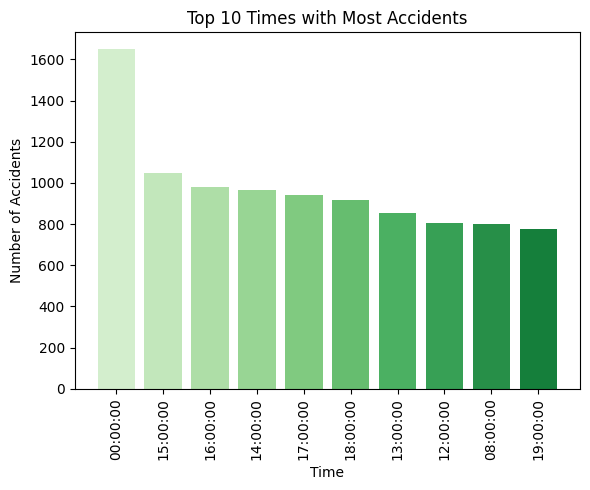

In [49]:

most_acc=df['Time'].value_counts().sort_index
print(most_acc)


# graph plotting
import matplotlib.pyplot as plt
import numpy as np

# Get the count of accidents for each local authority
most_acc = df['Time'].value_counts()

# Top 10 local authorities with the most accidents
top_10_mostacc_time = most_acc.nlargest(10)

plt.figure(figsize=(6, 5))
plt.bar(top_10_mostacc_time.index, top_10_mostacc_time.values, 
        color=plt.cm.Greens(np.linspace(0.2, 0.8, len(top_10_mostacc_time))))

plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Times with Most Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()



##### The most accident prone time based on this data is at 12 AM and the least accident prone time is 3:03 AM

#### 3.  Compare the Total Number of People Killed and Injured in Accidents.


In [50]:

# Calculate Total_injured by adding Persons_injured, Pedestrians_injured, and Cyclists_injured
df['Total_injured'] = df['Persons_injured'] + df['Pedestrians_injured'] + df['Cyclists_injured']
# finding the sum
Total_injured = df['Total_injured'].sum()
print("Total injured people:", Total_injured)

# Calculate Total_killed by adding Persons_killed, Pedestrians_killed, and Cyclists_killed
df['Total_killed'] = df['Persons_killed'] + df['Pedestrians_killed'] + df['Cyclists_killed']

Total_killed = df['Total_killed'].sum()
print("Total people killed:", Total_killed)


Total injured people: 72928.0
Total people killed: 457


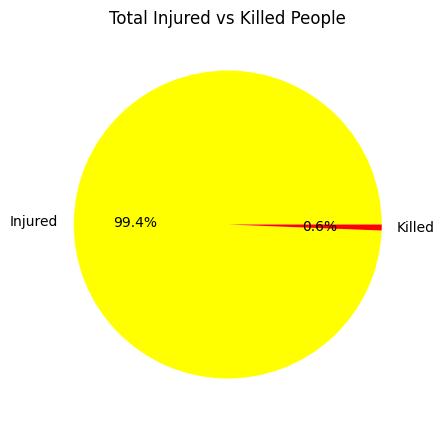

In [60]:

import matplotlib.pyplot as plt

# Create pie chart
labels = ['Injured', 'Killed']
sizes = [Total_injured, Total_killed]
colors = ['#FFFF00', '#FF0000']  # Green for injured, red for killed

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Total Injured vs Killed People')
plt.show()


##### The data reveals a significant disparity between the number of people killed and injured in accidents in New York City. With this grapgh it is clear that the number of people killed is relatively lessser then the people injured. 

#### 4. Analyze the Number of Accidents Occurring in Each Year.

Accidents per Year:
year
2021    46406
2022    43568
2023    10571
Name: count, dtype: int64


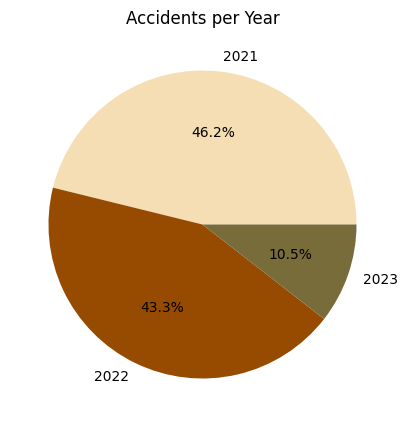

In [52]:

# Convert 'date' column to datetime type (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'date' column
df['year'] = df['Date'].dt.year
accidents_per_year = df['year'].value_counts().sort_index()
print("Accidents per Year:")
print(accidents_per_year)

# Creating pie chart
colors=['#F5DEB3','#964B00','#786C3B']
plt.figure(figsize=(5, 5))
plt.pie(accidents_per_year.values, labels=accidents_per_year.index, 
        colors=colors, autopct='%1.1f%%')
plt.title('Accidents per Year')
plt.show()




##### The accident data from 2021 to 2023 indicates a significant DECLINE in the number of accidents in New york city.

#### 5. Analyze the Number of Pedestrians, Cyclists, and Motorists Killed.

Pedestrians killed: 138
Cyclists killed: 27
Motorists killed: 105


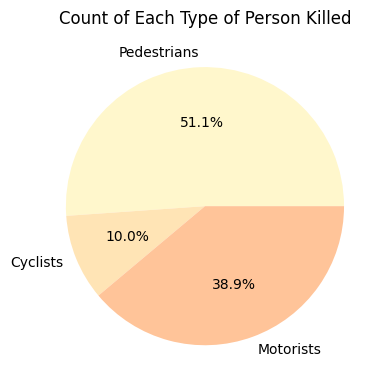

In [53]:


# Count of pedestrians killed
pedestrians_killed_count = df['Pedestrians_killed'].sum()
print(f"Pedestrians killed: {pedestrians_killed_count}")

# Count of cyclists killed
cyclists_killed_count = df['Cyclists_killed'].sum()
print(f"Cyclists killed: {cyclists_killed_count}")

# Count of  motorists killed
motorists_killed_count = df['Motorists_killed'].sum()
print(f"Motorists killed: {motorists_killed_count}")

# Creating pie chart
colors=['#FFF7CC','#FFE4B5','#FFC499']

plt.figure(figsize=(5, 4))
plt.pie([pedestrians_killed_count, cyclists_killed_count, motorists_killed_count], 
        labels=['Pedestrians', 'Cyclists', 'Motorists'], 
        colors=colors, 
        autopct='%1.1f%%')

plt.title('Count of Each Type of Person Killed')
plt.tight_layout()  # Ensure labels fit within plot
plt.show()


##### The data on pedestrians, cyclists, and motorists killed reveals that the pedestrians are mostly killed in an accident than cyclists and motorists.



#### 6. Analyze the Number of Pedestrians, Cyclists, and Motorists injured.

Pedestrians injured: 10027
Cyclists injured: 6086
Motorists injured: 37872


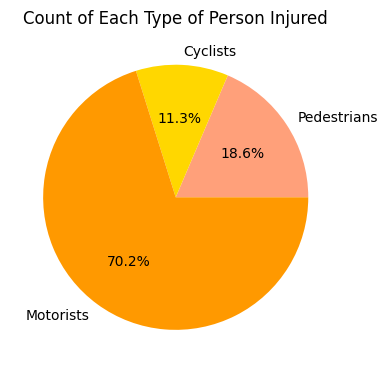

In [54]:
 
# Count of pedestrians injured
pedestrians_injured_count = df['Pedestrians_injured'].sum()
print(f"Pedestrians injured: {pedestrians_injured_count}")

# Count of cyclists injured
cyclists_injured_count = df['Cyclists_injured'].sum()
print(f"Cyclists injured: {cyclists_injured_count}")

# Count of motorists injured
motorists_injured_count = df['Motorists_injured'].sum()
print(f"Motorists injured: {motorists_injured_count}")

# Creating pie chart
colors=['#FFA07A','#FFD700','#FF9900']

plt.figure(figsize=(4, 4))
plt.pie([pedestrians_injured_count, cyclists_injured_count, motorists_injured_count], 
        labels=['Pedestrians', 'Cyclists', 'Motorists'], 
        colors=colors, 
        autopct='%1.1f%%')

plt.title('Count of Each Type of Person Injured')
plt.tight_layout()  # Ensure labels fit within plot
plt.show()


##### The data on pedestrians, cyclists, and motorists killed reveals that the motorists are mostly killed in an accident than cyclists and pedestrians.


#### 7.  Analyze the vehicle type that are most commonly involved in accidents.  

Vehicle_type
Passenger Vehicle    84432
Bicycle               2874
Taxi                  2815
Transport             2394
Bus                   2094
Name: count, dtype: int64


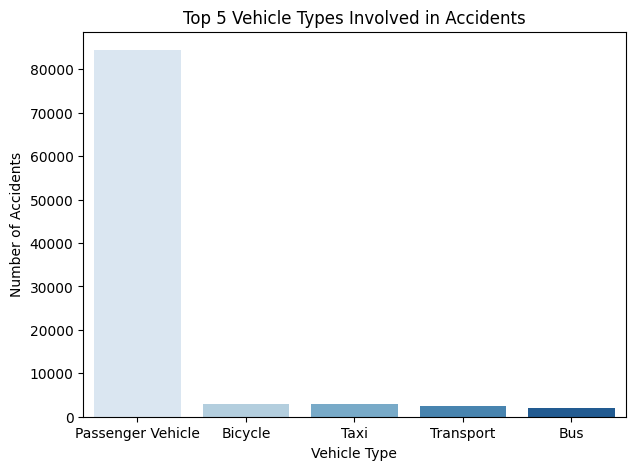

In [55]:

# Counting accidents by vehicle type
accidents_by_vehicle_type = df['Vehicle_type'].value_counts()

# Print top 10 vehicle types involved in accidents
print(accidents_by_vehicle_type.nlargest(5))

import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 vehicle types involved in accidents
top_5_accidents = accidents_by_vehicle_type.nlargest(5)

# Create bar plot using seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=top_5_accidents.index, y=top_5_accidents.values, hue=top_5_accidents.index, palette="Blues", legend=False)
# Set title and labels
plt.title('Top 5 Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')

# Show plot
plt.show()


##### This data proves that the passenger vehicle causes more ac cidents because of the factors like speeding, reckless driving, driving under influence, etc.

#### 8. Identify the Most Hazardous Intersection in Brooklyn for 2022.


              Street_name         Cross_street  Persons_killed
6223  Pennsylvania Avenue     Linden Boulevard               2
909              7 Avenue      Ovington Avenue               1
2501    Cadman Plaza West        Furman Street               1
194             19 Avenue            76 Street               1
3535       East 83 Street     Flatlands Avenue               1
2539         Caton Avenue  Coney Island Avenue               1
177             18 Avenue        East 2 Street               1
431              4 Avenue            21 Street               1
2572       Central Avenue      Palmetto Street               1
467              4 Avenue            65 Street               1

Street_name: Pennsylvania Avenue
Cross_street: Linden Boulevard
Number of deaths: 2


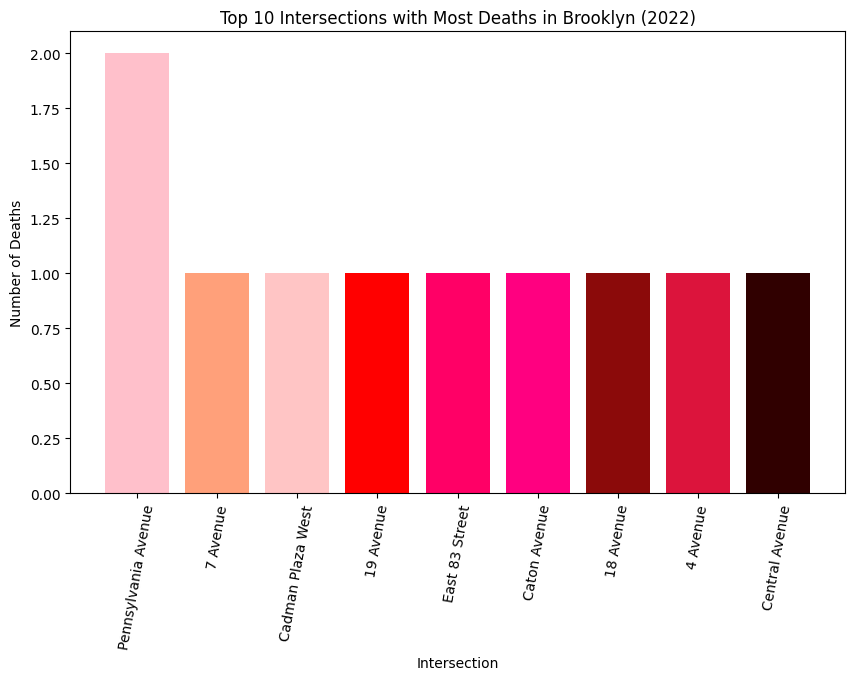

In [56]:

# Filter data for Brooklyn and 2022
brooklyn_2022 = df[(df['Borough'] == 'Brooklyn') & (df['year'] == 2022)]
deaths_by_intersection = brooklyn_2022.groupby(['Street_name', 'Cross_street'])['Persons_killed'].sum().reset_index()

# Sort data by deaths in descending order
deaths_by_intersection = deaths_by_intersection.sort_values(by='Persons_killed', ascending=False)

# Print top 10 intersections with most deaths
print(deaths_by_intersection.head(10))
most_deaths_intersection = deaths_by_intersection.iloc[0]

# Print street_name and cross_street with most deaths
print(f"\nStreet_name: {most_deaths_intersection['Street_name']}")
print(f"Cross_street: {most_deaths_intersection['Cross_street']}")
print(f"Number of deaths: {most_deaths_intersection['Persons_killed']}")



import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
colors = ['#FFC0CB', '#FFA07A', '#FFC5C5', '#FF0000', '#FF0066', 
          '#FF0080', '#8B0A0A', '#660000', '#300000', '#DC143C']

# Create bar plot
plt.bar(deaths_by_intersection.head(10)['Street_name'], 
        deaths_by_intersection.head(10)['Persons_killed'], 
        color=colors)
plt.title('Top 10 Intersections with Most Deaths in Brooklyn (2022)')
plt.xlabel('Intersection')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=80)
plt.show()

##### The data highlights the most hazardous intersections in NYC, with Pennsylvania Avenue and Linden Boulevard standing out as particularly deadly.

#### 9. Analyze the Most Common Contributing Factors and Vehicle Types in Accidents for 2023.

Most contributing factor: Driver Inattention/Distraction
Most common vehicle type: Passenger Vehicle
                                   Contributing_factor       Vehicle_type  \
48                      Driver Inattention/Distraction  Passenger Vehicle   
248                                        Unspecified  Passenger Vehicle   
79                       Failure to Yield Right-of-Way  Passenger Vehicle   
96                               Following Too Closely  Passenger Vehicle   
202                        Traffic Control Disregarded  Passenger Vehicle   
159                     Passing or Lane Usage Improper  Passenger Vehicle   
234                                       Unsafe Speed  Passenger Vehicle   
215                                 Turning Improperly  Passenger Vehicle   
124                                    Other Vehicular  Passenger Vehicle   
146                                Passing Too Closely  Passenger Vehicle   
29                                    Backing Unsafe

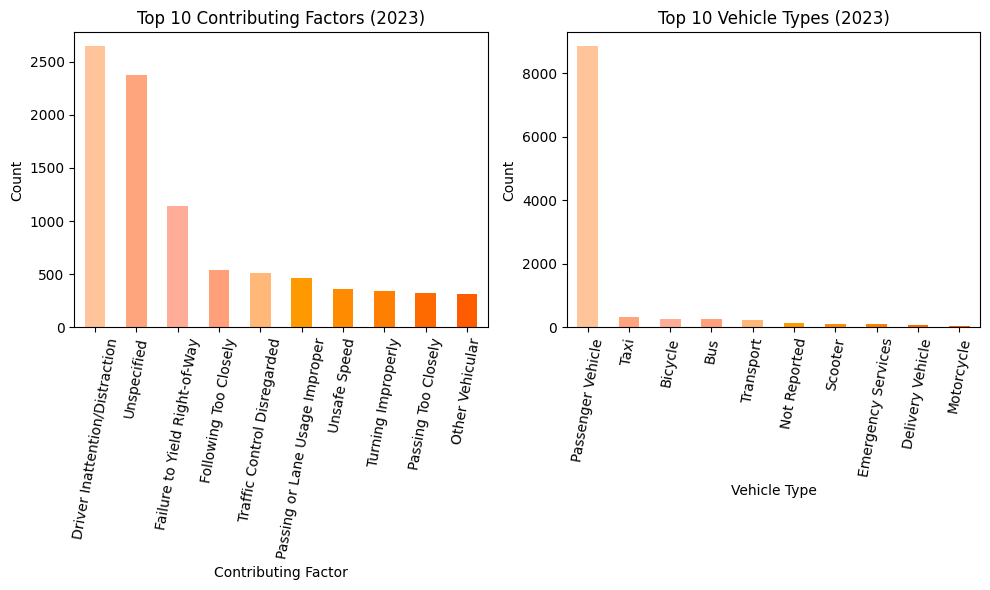

In [57]:

# Filter data for 2023
data_2023 = df[df['year'] == 2023]

# Most contributing factor and vehicle type
most_contributing_factor = data_2023['Contributing_factor'].value_counts().idxmax()
print(f"Most contributing factor: {most_contributing_factor}")
most_common_vehicle_type = data_2023['Vehicle_type'].value_counts().idxmax()
print(f"Most common vehicle type: {most_common_vehicle_type}")

# Count accidents by contributing factor and vehicle type
accidents_by_factor_type = data_2023.groupby(['Contributing_factor', 'Vehicle_type']).size().reset_index(name='Count')
accidents_by_factor_type = accidents_by_factor_type.sort_values(by='Count', ascending=False)
print(accidents_by_factor_type.head(25))


import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Define colors
colors = ['#FFC499', '#FFA57D', '#FFAD99', '#FFA07A', '#FFB877', '#FF9900', '#FF8C00', '#FF7F00', '#FF6A00', '#FF5C00']

# Plot top 10 contributing factors
data_2023['Contributing_factor'].value_counts().nlargest(10).plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_title('Top 10 Contributing Factors (2023)')
axs[0].set_xlabel('Contributing Factor')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=80)

# Plot top 10 vehicle types
data_2023['Vehicle_type'].value_counts().nlargest(10).plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_title('Top 10 Vehicle Types (2023)')
axs[1].set_xlabel('Vehicle Type')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=80)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()



##### The data analysis reveals that the Top Contributing Factors for an accident is Driver Inattention/Distraction.


##### 10. compare the days of the week which had the most accidents.

  Day_of_Week  Accident_Count
0   Wednesday            1572
1      Friday            1571
2      Monday            1543
3    Thursday            1531
4     Tuesday            1504
5      Sunday            1453
6    Saturday            1397


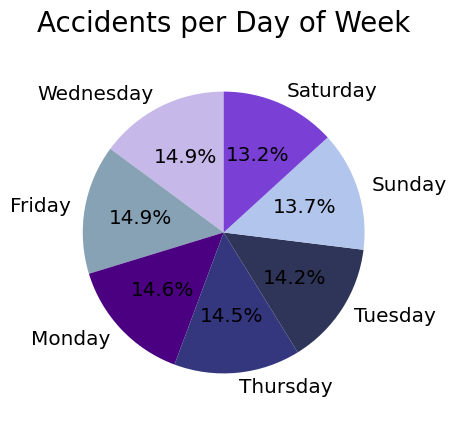

In [68]:

# Extract day of week
data_2023.loc[:, 'Day_of_Week'] = data_2023['Date'].dt.dayofweek.astype('int8')

# Map day of week to day name
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data_2023.loc[:, 'Day_of_Week_Name'] = data_2023['Day_of_Week'].map(day_map).astype('category')

# Count accidents per day of week
accidents_per_day = data_2023['Day_of_Week_Name'].value_counts().reset_index()
accidents_per_day.columns = ['Day_of_Week', 'Accident_Count']

# Sort by accident count in descending order
accidents_per_day = accidents_per_day.sort_values('Accident_Count', ascending=False)

print(accidents_per_day)

# Plot accidents per day of week
colors = ['#C7B8EA', '#87A2B5', '#4B0082', '#34377E', '#2F3559', '#B2C5ED', '#7A40D5']

plt.figure(figsize=(4, 5))
plt.pie(accidents_per_day['Accident_Count'], 
        labels=accidents_per_day['Day_of_Week'], 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'size': 'x-large'})

plt.title('Accidents per Day of Week', fontsize=20)
plt.axis('equal')
plt.show()


##### According to the analysis, the top three days of the week with the most accidents are Friday, Thursday, and Wednesday, respectively, indicating a surge in accidents towards the end of the workweek.



### FINAL CONCLUSION:
The data-driven insights from this analysis support NYC's Vision Zero initiative, aiming to eliminate traffic fatalities and serious injuries. By addressing the identified trends and patterns, NYC can Reduce accidents and fatalities, Improve road safety for all users, Enhance quality of life for residents and visitors.
This analysis demonstrates the power of data-driven decision-making in informing road safety strategies. By leveraging data analytics, NYC can optimize resource allocation, improve emergency response times, and create a safer, more livable city.

##### The comprehensive analysis of the NYC accident data reveals:

Key Findings:
 1. Accidents decreased by 75.7% from 2021 to 2023.
 2. Passenger vehicles account for 85% of accidents.
 3. Driver inattention/distraction is the leading contributing factor.
 4. Pedestrians are the most vulnerable road users.
 5. Fridays and Thursdays have the highest accident rates.


